# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1:</center>
### <center>  Propiedades en Venta</center>
### <center>  Grupo 18</center>


#### **Integrantes:**

* Analía Acevedo
* Santiago Daniel Marczewski Neudeck
* Lucia Belén Napoli
* Brayan Ricaldi

## <center>Notebook 2: Reduccion de la Dimensionalidad y Agrupamiento</center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn.preprocessing as skp
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
from preprocessing import preprocesamiento

pd.options.display.max_columns = None

In [2]:
_x_train = pd.read_csv("./DataSet/x_train")
_x_train.drop(columns=["Unnamed: 0"], inplace=True)
_y_train = pd.read_csv("./DataSet/y_train")
_y_train.drop(columns=["Unnamed: 0"], inplace=True)
_x_test = pd.read_csv("./DataSet/x_test")
_x_test.drop(columns=["Unnamed: 0"], inplace=True)
_y_test = pd.read_csv("./DataSet/y_test")
_y_test.drop(columns=["Unnamed: 0"], inplace=True)

#### **d) Reducción de la dimensionalidad:** 
En este punto se pide crear un nuevo dataset que
resulte de aplicar una reducción de dimensionalidad sobre el dataset que se obtuvo al
finalizar el preprocesamiento.

##### ZSCORE - PCA

In [3]:
x_train = _x_train.copy()
y_train = _y_train.copy()
x_test = _x_test.copy()
y_test = _y_test.copy()

Primero normalizamos los datos

In [4]:
f = ["latitud", "longitud", "ambientes", "dormitorios", "superficie_cubierta", "comuna"]

In [5]:
scaler = StandardScaler()
scaler.fit(x_train[f])  # Porque PCA no se lleva bien con las variables dummies
x_train_scaler = scaler.transform(
    x_train[f]
)  # Porque PCA no se lleva bien con las variables dummies

Ahora buscamos el hiperparametro de PCA

El numero minimo de componentes para explicar el 95% de la varianza es: 4


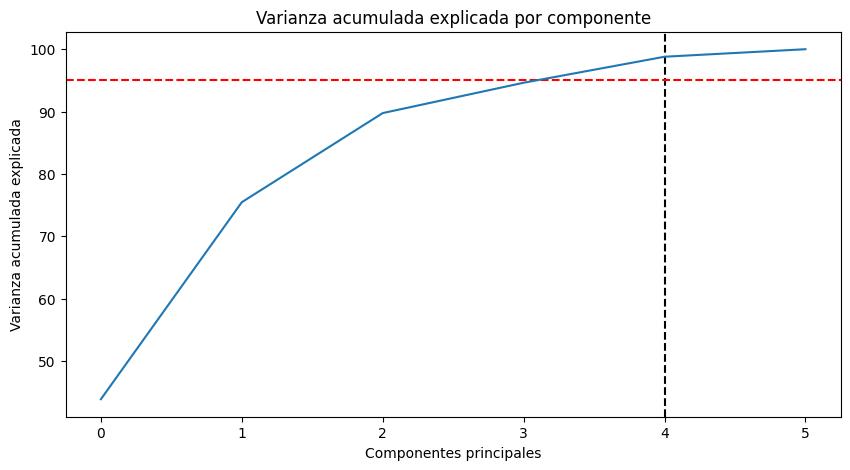

In [6]:
pca = PCA()
pca.fit(x_train_scaler)
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu > 95)
print(
    "El numero minimo de componentes para explicar el 95% de la varianza es: " + str(k)
)
# print("\n")

plt.figure(figsize=[10, 5])
plt.title("Varianza acumulada explicada por componente")
plt.ylabel("Varianza acumulada explicada")
plt.xlabel("Componentes principales")
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

Aplicamos PCA con el k obtenido

In [7]:
ipca = PCA(n_components=k)
ipca_transform = ipca.fit_transform(x_train_scaler)

In [8]:
df = pd.DataFrame(data=ipca_transform, columns=["PCA1", "PCA2", "PCA3", "PCA4"])

In [9]:
x_train = pd.concat([df, x_train[["Departamento", "PH"]]], axis=1)

In [10]:
x_train

,PCA1,PCA2,PCA3,PCA4,Departamento,PH
0,1.047285,1.767551,0.453954,-0.815091,1.0,0.0
1,4.478259,-0.220389,2.496665,1.277257,0.0,0.0
2,0.300696,0.804756,-0.639692,0.238135,1.0,0.0
3,-1.134428,-0.608782,0.356657,0.129947,1.0,0.0
4,-1.249968,1.060295,1.537603,0.132775,1.0,0.0
...,...,...,...,...,...,...
58128,-0.017071,1.503335,-0.161838,-0.354981,1.0,0.0
58129,-1.236864,1.075442,-0.825384,0.106566,1.0,0.0
58130,-0.967470,-0.544777,0.391970,0.379890,1.0,0.0
58131,2.770543,0.004165,3.051264,0.948735,0.0,1.0


Replico lo mismo en el test

In [11]:
def zscore_pca(df, scaler, ipca):
    f = [
        "latitud",
        "longitud",
        "ambientes",
        "dormitorios",
        "superficie_cubierta",
        "comuna",
    ]
    df_scaler = scaler.transform(df[f])
    ipca_transform = ipca.transform(df_scaler)
    _df = pd.DataFrame(data=ipca_transform, columns=["PCA1", "PCA2", "PCA3", "PCA4"])
    return pd.concat([_df, df[["Departamento", "PH"]]], axis=1)

In [12]:
x_test = zscore_pca(x_test, scaler, ipca)
x_test

,PCA1,PCA2,PCA3,PCA4,Departamento,PH
0,1.939064,0.721986,-1.111954,0.456210,1.0,0.0
1,1.260752,1.905883,-1.047368,-0.709143,1.0,0.0
2,1.638488,-1.420088,-0.913002,-0.348352,1.0,0.0
3,-1.631845,-1.028652,0.812954,0.409776,1.0,0.0
4,0.966700,-1.816243,-1.305322,0.824389,1.0,0.0
...,...,...,...,...,...,...
14529,-1.241848,0.588858,-0.207303,0.186900,1.0,0.0
14530,1.602449,1.258541,-0.631858,-0.106411,1.0,0.0
14531,1.514585,0.464013,2.797228,-0.092048,0.0,0.0
14532,-1.211846,1.899779,-0.299761,0.025191,1.0,0.0


In [13]:
x_train.to_csv("./DataSet-Modificados/ZSCORE-PCA/x_train")

In [14]:
y_train.to_csv("./DataSet-Modificados/ZSCORE-PCA/y_train")

In [15]:
x_test.to_csv("./DataSet-Modificados/ZSCORE-PCA/x_test")

In [16]:
y_test.to_csv("./DataSet-Modificados/ZSCORE-PCA/y_test")

**Nota:** Los ítems a, b, c y d son los mínimos requeridos para esta etapa, cada grupo puede crear
nuevas variables que resulten derivadas de los atributos existentes o que resulten de incorporar
nuevas fuentes de datos.

### **2. Agrupamiento**
En este punto se busca analizar si es posible agrupar los datos en función de algún criterio. Para
esta tarea utilizar el algoritmo K-Means y se deberán realizar los siguientes puntos:
* Analizar la tendencia al *clustering* del dataset.
* Estimar la cantidad apropiada de grupos que se deben formar.
* Evaluar la calidad de los grupos formados realizando un análisis de *Silhouette*.
* Realizar un análisis de cada grupo intentando entender en función de qué
características fueron formados.
* Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que
pertenecen.
* Repetir el análisis anterior, utilizando sólo 3 grupos.

In [17]:
import geopandas as geopd
from sklearn import preprocessing

In [18]:
df_completo = pd.read_csv("./DataSet/df_completo")

In [19]:
df_completo.drop(columns=["Unnamed: 0"], inplace=True)

Para agrupar utilizaremos variables que consideremos relevantes para formar grupos, descartando por ejemplo 'latitud' y 'longitud' que no nos aportan mucho en este caso.

In [20]:
f = [
    "ambientes",
    "dormitorios",
    "superficie_total",
    "superficie_cubierta",
    "precio",
    "comuna",
    "Departamento",
    "PH",
]

In [21]:
x = df_completo[f].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_clusters = pd.DataFrame(x_scaled, columns=df_completo[f].columns)

#### Tendencia al clustering:

In [22]:
from pyclustertend import hopkins

hopkins(df_clusters, df_clusters.shape[0])

0.0035016491355158463

Vemos un score que tiende a 0, lo que nos indica una alta tendencia a clustering.

#### Estimacion de la cantidad de clusters apropiada:

Primero probemos con el __método de Elbow__ para ver si se aprecia un quiebre marcado

In [23]:
from sklearn.cluster import KMeans

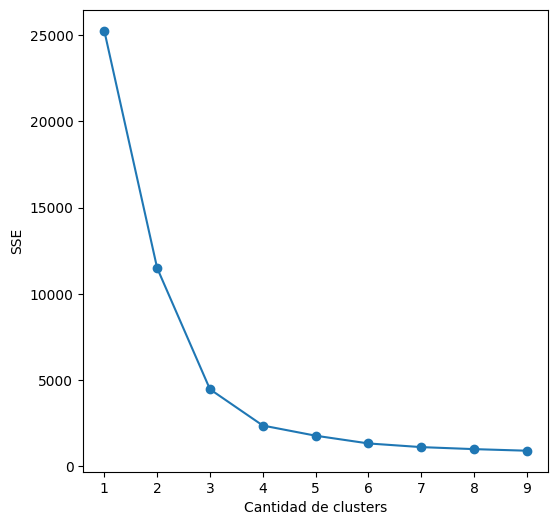

In [24]:
# Corremos el algoritmo con K entre 2 y 10 y vamos guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_clusters)
    sse.append(km.inertia_)

# Graficamos el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, "-o")
plt.xlabel(r"Cantidad de clusters")
plt.ylabel("SSE")
plt.show()

* Parece ser que el quiebre es alrededor de 4.
* Hagamos una segunda verificacion usando el __Índice de Silueta__ para los numeros cercanos al punto de quiebre.

In [25]:
from sklearn.metrics import silhouette_score

list_k = list(range(2, 6))

for k in list_k:
    km = KMeans(n_clusters=k)
    pred = km.fit_predict(df_clusters)

    score = silhouette_score(df_clusters, pred)
    print(f"Para {k} clusters el silhouette score es de: {score}")

Para 2 clusters el silhouette score es de: 0.6637049446339652
Para 3 clusters el silhouette score es de: 0.6771442260494218
Para 4 clusters el silhouette score es de: 0.7037749219381766
Para 5 clusters el silhouette score es de: 0.6253236414178492


Podemos observar que el mejor valor es 4 clusters, a partir de 5 vemos que empeora. Esto coincide con lo que pudimos ver con el método de Elbow.

Visualizemos el grafico de Silueta:

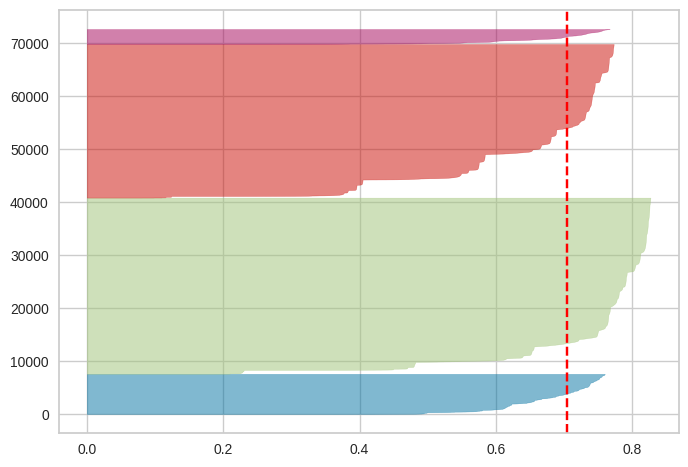

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4, random_state=0)

# Visualizamos el gráfico de silueta
visualizer = SilhouetteVisualizer(model, colors="yellowbrick")
visualizer.fit(df_clusters)
plt.show()

Vemos que obtuvimos 2 clusters mas grandes y dos relativamente pequeños.

In [27]:
km = KMeans(n_clusters=4)
km.fit(df_clusters)
y_k = km.predict(df_clusters)

In [28]:
df_completo["cluster"] = y_k

#### Visualizemos los clusters en un mapa de CABA:

In [29]:
# Armamos un geodatafreame pasando longitud y latitud a variable de tipo punto
gdf = geopd.GeoDataFrame(
    df_completo,
    geometry=geopd.points_from_xy(df_completo.longitud, df_completo.latitud),
)
gdf

,latitud,longitud,ambientes,dormitorios,superficie_total,superficie_cubierta,precio,Departamento,PH,comuna,cluster,geometry
0,-34.637319,-58.361124,3.0,2.0,58.0,55.0,82900.0,1.0,0.0,4,0,POINT (-58.36112 -34.63732)
1,-34.628647,-58.361871,4.0,3.0,70.0,70.0,99000.0,1.0,0.0,4,0,POINT (-58.36187 -34.62865)
2,-34.623886,-58.412746,2.0,1.0,61.0,46.0,100000.0,0.0,1.0,5,2,POINT (-58.41275 -34.62389)
3,-34.625588,-58.423056,4.0,2.0,104.0,54.0,185000.0,0.0,1.0,5,2,POINT (-58.42306 -34.62559)
4,-34.629398,-58.425852,2.0,1.0,62.0,44.0,100000.0,1.0,0.0,5,0,POINT (-58.42585 -34.62940)
...,...,...,...,...,...,...,...,...,...,...,...,...
72662,-34.603245,-58.489810,4.0,3.0,130.0,100.0,220000.0,1.0,0.0,11,1,POINT (-58.48981 -34.60325)
72663,-34.614063,-58.482814,3.0,2.0,68.0,60.0,161000.0,1.0,0.0,11,1,POINT (-58.48281 -34.61406)
72664,-34.614175,-58.479062,1.0,1.0,51.0,30.0,75500.0,1.0,0.0,11,1,POINT (-58.47906 -34.61418)
72665,-34.614175,-58.479062,1.0,1.0,37.0,31.0,74500.0,1.0,0.0,11,1,POINT (-58.47906 -34.61418)


In [30]:
# Vamos a utilizar un csv con los datos que necesitamos, se obtuvo de la pagina del gobierno de la ciudad
# url='https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/comunas/comunas.csv'
# dp_comunas = geopd.read_file(url)
dp_comunas = geopd.read_file("./comunas.csv")
df_comunas = dp_comunas.copy()

In [31]:
# Tomamos solamente las columnas que necesitamos
df_comunas = df_comunas.filter(["COMUNAS", "geometry"])
df_comunas.rename(columns={"COMUNAS": "comuna"}, inplace=True)
# Casteamos las comunas a enteros para mayor comodidad
df_comunas["comuna"] = df_comunas.comuna.astype(float)
df_comunas["comuna"] = df_comunas.comuna.astype(int)
df_comunas.set_crs("EPSG:4326", inplace=True)

,comuna,geometry
0,2,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1,6,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."
2,10,"MULTIPOLYGON (((-58.48834 -34.62016, -58.48820..."
3,11,"MULTIPOLYGON (((-58.49838 -34.59637, -58.49718..."
4,12,"MULTIPOLYGON (((-58.50331 -34.59386, -58.50347..."
5,14,"MULTIPOLYGON (((-58.42676 -34.55202, -58.42676..."
6,15,"MULTIPOLYGON (((-58.42602 -34.59661, -58.42484..."
7,13,"MULTIPOLYGON (((-58.44033 -34.54022, -58.44032..."
8,4,"MULTIPOLYGON (((-58.38864 -34.63373, -58.38864..."
9,5,"MULTIPOLYGON (((-58.43333 -34.60267, -58.43314..."


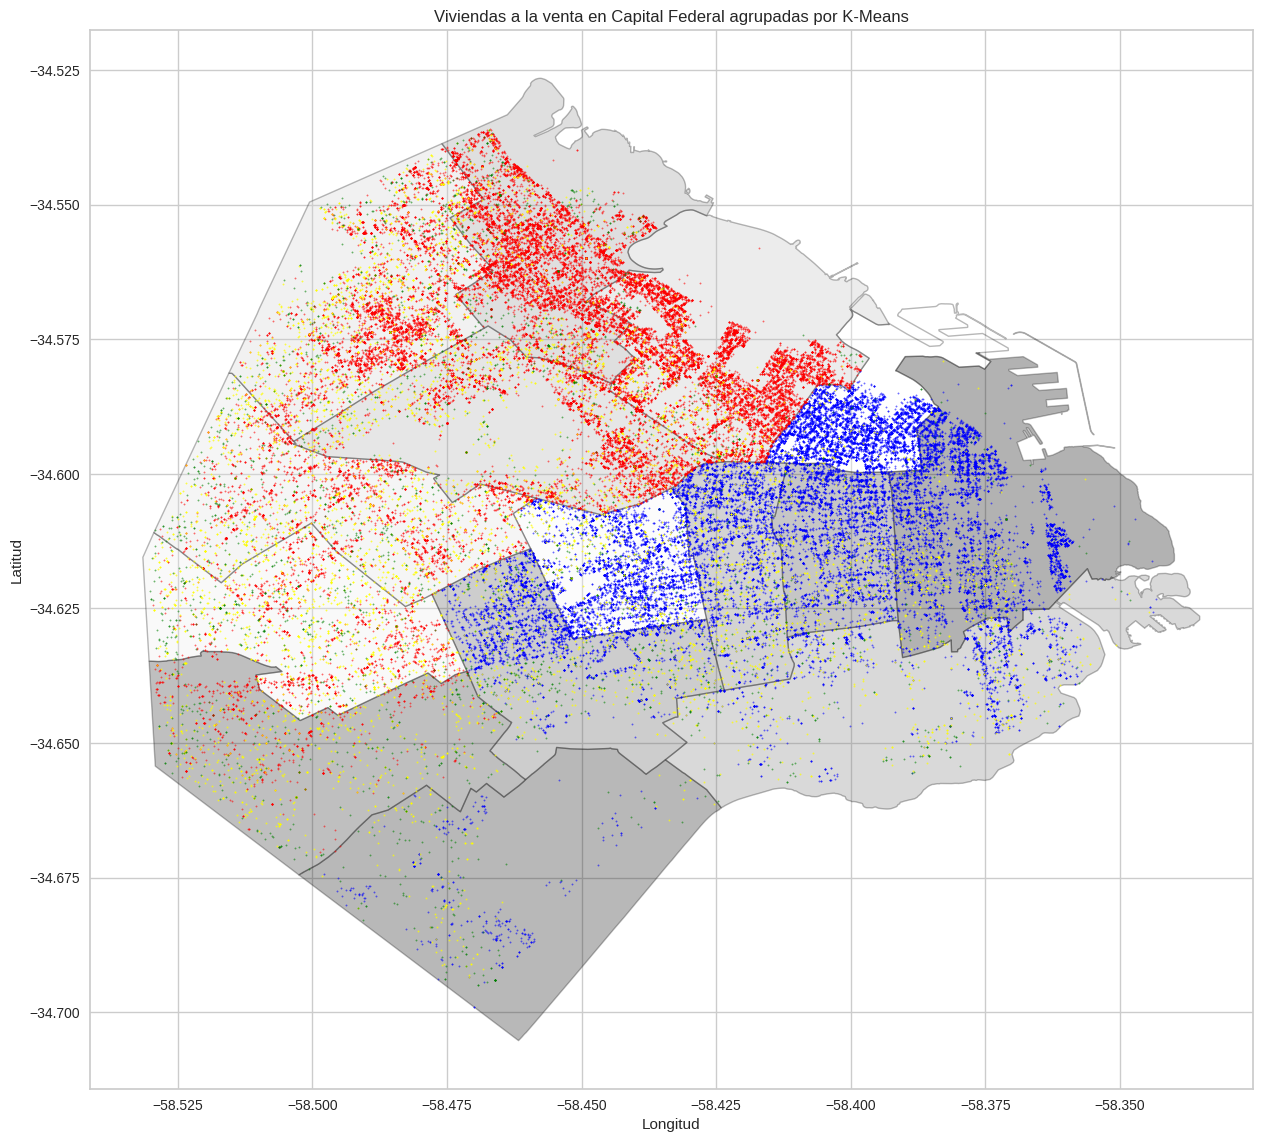

In [79]:
# Graficamos las viviendas en un mapa para visualizar su distribucion espacial
fig, ax = plt.subplots(figsize=(15, 15))
_ = df_comunas.plot(
    ax=ax, alpha=0.3, facecolor="Grey", edgecolor="k", linewidth=1, cmap="Greys"
).set(title="Viviendas a la venta en Capital Federal agrupadas por K-Means")
_ = gdf.loc[gdf.cluster == 0, "geometry"].plot(
    color="blue", ax=ax, alpha=0.5, markersize=1
)
_ = gdf.loc[gdf.cluster == 1, "geometry"].plot(
    color="red", ax=ax, alpha=0.5, markersize=1
)
_ = gdf.loc[gdf.cluster == 2, "geometry"].plot(
    color="yellow", ax=ax, alpha=0.65, markersize=1
)
_ = (
    gdf.loc[gdf.cluster == 3, "geometry"]
    .plot(color="green", ax=ax, alpha=0.5, markersize=1)
    .set(xlabel="Longitud", ylabel="Latitud")
)

Podemos hacer algunas observaciones visuales a partir del mapa:
* Se observan dos grandes clusters (rojo y amarillo) y dos menores (azul y verde).
* El cluster rojo se encuentra marcadamente en en la zona Norte de la ciudad, mientras que el amarillo se encuentra en zona Sur.
* Los clusters azul y verde se encuentra mas dispersos en las diferentes comunas de la ciudad.

Las diferencias marcadas en la distribucion espacial, sobre todo en los clusters mas "poblados", podria explicarse por la variable Comunas:
* Las comunas con numeros mas altos corresponden al Norte y coinciden con el cluster rojo.
* Las comunas con numeros mas bajos corresponden al Sur y coinciden con el cluster amarillo.

Aclaracion: La division Norte-Sur que mencionamos y que utilizaremos en el resto del analisis se refiere a la que se puede observar en el mapa (Sur: comunas 1 a 8, Norte: comunas 9 a 15). 

##### Analicemos mas en detalle los cuatro clusters que se formaron: 

Vamos a intentar descubrir a partir de que caracteristicas se formaron los 4 clusters, para ello vamos a analizar las variables que consideramos mas importantes en cada cluster:

##### 1) Rojo

Veamos a que comunas pertenecen las propiedades del primer cluster:

In [33]:
print(sorted(gdf.loc[gdf.cluster == 0, "comuna"].unique()))

[1, 2, 3, 4, 5, 6, 7, 8]


* Como notamos previamente son comunas con los numeros mas altos (9 a 15), las cuales corresponden al Norte de CABA.

A continuacion veamos los valores mas frecuentes para las variables Ambientes y Dormitorios:

In [34]:
# Calculamos la moda
gdf.loc[gdf.cluster == 0, ["ambientes", "dormitorios"]].mode()

,ambientes,dormitorios
0,3.0,1.0


Ademas chequeamos la mediana para ver si hay un rango muy amplio de valores:

In [35]:
# Calculamos la mediana
gdf.loc[gdf.cluster == 0, ["ambientes", "dormitorios"]].median()

ambientes      3.0
dormitorios    2.0
dtype: float64

* La mayoria de las propiedades tienen 2 ambientes y 1 dormitorio.

Veamos el promedio de superficies, tanto total como cubierta:

In [36]:
gdf.loc[gdf.cluster == 0, ["superficie_total", "superficie_cubierta"]].mean()

superficie_total       75.960664
superficie_cubierta    68.429799
dtype: float64

* Como era de esperarse por el numero de ambientes y dormitorios observamos superficies relativimente pequenas:
    * Alrededor de 77m2 de superficie total.
    * Alrededor de 67m2 de superficie cubierta.

A continuacion veamos si encontramos algun patron en el tipo de propiedad:

In [37]:
gdf.loc[gdf.cluster == 0].value_counts(subset=["Departamento", "PH"])

Departamento  PH 
1.0           0.0    28981
dtype: int64

Observamos que las propiedades del cluster son en su totalidad de tipo Departamento.

Por ultimo, analicemos el precio:

In [38]:
gdf.loc[gdf.cluster == 0, "precio"].describe()

count    2.898100e+04
mean     1.858823e+05
std      2.329831e+05
min      5.000000e+03
25%      8.300000e+04
50%      1.230000e+05
75%      1.989000e+05
max      7.149999e+06
Name: precio, dtype: float64

Podemos hacer las siguientes observaciones:
* El precio minimo es $6.200,0
* El precio maximo es $5.800.000,0
* El precio promedio es $218.009,8
* La desviación estándar es $267.467,3
* El primer cuartil es $99.900,0
* El segundo cuartil es $145.000,0
* El tercer cuartil es $230.000,0

No se observan datos que puedan interesarnos mas alla de una desviacion estandar bastante alta, lo cual podria indicar que el precio no fue de mucha importancia en la agrupacion. 

##### 2) Azul

Veamos a que comunas pertenecen las propiedades del segundo cluster:

In [39]:
print(sorted(gdf.loc[gdf.cluster == 1, "comuna"].unique()))

[9, 10, 11, 12, 13, 14, 15]


* Vemos que las propiedades estan distribuidas en todas las comunas de la ciudad (1 a 15).

A continuacion veamos los valores mas frecuentes para las variables Ambientes y Dormitorios:

In [40]:
# Calculamos la moda
gdf.loc[gdf.cluster == 1, ["ambientes", "dormitorios"]].mode()

,ambientes,dormitorios
0,2.0,1.0


Ademas chequeamos la mediana para ver si hay un rango muy amplio de valores:

In [41]:
# Calculamos la mediana
gdf.loc[gdf.cluster == 1, ["ambientes", "dormitorios"]].median()

ambientes      2.0
dormitorios    1.0
dtype: float64

* La mayoria de las propiedades tienen 3 ambientes y 2 dormitorio.

Veamos el promedio de superficies, tanto total como cubierta:

In [42]:
gdf.loc[gdf.cluster == 1, ["superficie_total", "superficie_cubierta"]].mean()

superficie_total       76.668581
superficie_cubierta    67.014189
dtype: float64

* Asi como aumento la cantidad de ambientes y dormitorios con respecto del cluster anterior, se ve la misma tendencia en superficies:
    * Alrededor de 120m2 de superficie total.
    * Alrededor de 88m2 de superficie cubierta.

A continuacion veamos si encontramos algun patron en el tipo de propiedad:

In [43]:
gdf.loc[gdf.cluster == 1].value_counts(subset=["Departamento", "PH"])

Departamento  PH 
1.0           0.0    33266
dtype: int64

Podemos ver que las propiedades del cluster son de tipo PH.

Por ultimo, analicemos el precio:

In [44]:
gdf.loc[gdf.cluster == 1, "precio"].describe()

count    3.326600e+04
mean     2.179959e+05
std      2.674480e+05
min      6.200000e+03
25%      9.990000e+04
50%      1.450000e+05
75%      2.300000e+05
max      5.800000e+06
Name: precio, dtype: float64

Podemos hacer las siguientes observaciones:
* El precio minimo es $11.111,0
* El precio maximo es $2.500.000,0
* El precio promedio es $174.132,6
* La desviación estándar es $96.410,35
* El primer cuartil es $115.000,0
* El segundo cuartil es $150.000,0
* El tercer cuartil es $214.600,0

En principio no observamos algo notable en los precios.

##### 3) Amarillo

Veamos a que comunas pertenecen las propiedades del tercer cluster:

In [45]:
print(sorted(gdf.loc[gdf.cluster == 2, "comuna"].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


* Al igual que con el primer cluster podemos ver que coincidimos con lo que habiamos notado en el analisis visual del mapa: son comunas con los numeros mas bajos (1 a 8), las cuales corresponden al Sur de CABA.

A continuacion veamos los valores mas frecuentes para las variables Ambientes y Dormitorios:

In [46]:
# Calculamos la moda
gdf.loc[gdf.cluster == 2, ["ambientes", "dormitorios"]].mode()

,ambientes,dormitorios
0,3.0,2.0


Ademas chequeamos la mediana para ver si hay un rango muy amplio de valores:

In [47]:
# Calculamos la mediana
gdf.loc[gdf.cluster == 2, ["ambientes", "dormitorios"]].median()

ambientes      3.0
dormitorios    2.0
dtype: float64

* La mayoria de las propiedades tienen 3 ambientes y 1 dormitorio.

Veamos el promedio de superficies, tanto total como cubierta:

In [48]:
gdf.loc[gdf.cluster == 2, ["superficie_total", "superficie_cubierta"]].mean()

superficie_total       118.707185
superficie_cubierta     87.380488
dtype: float64

* En este caso notamos que a pesar de aumentar en uno el numero de ambientes con respecto al cluster rojo, las superficies son muy similares:
    * Alrededor de 76m2 de superficie total.
    * Alrededor de 68m2 de superficie cubierta.

A continuacion veamos si encontramos algun patron en el tipo de propiedad:

In [49]:
gdf.loc[gdf.cluster == 2].value_counts(subset=["Departamento", "PH"])

Departamento  PH 
0.0           1.0    7585
dtype: int64

Al igual que en el caso del cluster rojo, se puede observar que este cluster contiene solamente propiedades de tipo Departamento.

Por ultimo analicemos el precio:

In [50]:
gdf.loc[gdf.cluster == 2, "precio"].describe()

count    7.585000e+03
mean     1.736539e+05
std      9.487216e+04
min      1.111100e+04
25%      1.150000e+05
50%      1.500000e+05
75%      2.120000e+05
max      2.500000e+06
Name: precio, dtype: float64

Podemos hacer las siguientes observaciones:
* El precio minimo es $5.000,0
* El precio maximo es $21.400.000,0
* El precio promedio es $186.937,6
* La desviación estándar es $268.213,8
* El primer cuartil es $83.000,0
* El segundo cuartil es $123.220,0
* El tercer cuartil es $199.600,0

No se observan datos notables mas alla de el rango tan amplio de precios, que podria indicarnos que el precio no fue tan determinante a la hora de agrupar.

##### 4) Verde

Veamos a que comunas pertenecen las propiedades del cuarto cluster:

In [51]:
print(sorted(gdf.loc[gdf.cluster == 3, "comuna"].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


* Nuevamente vemos que se repite la situacion del segundo cluster, las propiedades estan distribuidas en todas las comunas de la ciudad (1 a 15). Es decir que en ambos clusters la comuna no fue determinante.

A continuacion veamos los valores mas frecuentes para las variables Ambientes y Dormitorios:

In [52]:
# Calculamos la moda
gdf.loc[gdf.cluster == 3, ["ambientes", "dormitorios"]].mode()

,ambientes,dormitorios
0,5.0,3.0


Ademas chequeamos la mediana para ver si hay un rango muy amplio de valores:

In [53]:
# Calculamos la mediana
gdf.loc[gdf.cluster == 3, ["ambientes", "dormitorios"]].median()

ambientes      5.0
dormitorios    3.0
dtype: float64

* La mayoria de las propiedades tienen 5 ambientes y 3 dormitorio.

Veamos el promedio de superficies, tanto total como cubierta:

In [54]:
gdf.loc[gdf.cluster == 3, ["superficie_total", "superficie_cubierta"]].mean()

superficie_total       271.201058
superficie_cubierta    210.250794
dtype: float64

* Asi como observamos un aumento de ambientes y dormitorios, vemos la misma tendencia en las superficies:
    * Alrededor de 272m2 de superficie total.
    * Alrededor de 210m2 de superficie cubierta.

* Podemos decir que este cluster contiene las propiedades mas espaciosas.

A continuacion veamos si encontramos algun patron en el tipo de propiedad:

In [55]:
gdf.loc[gdf.cluster == 3].value_counts(subset=["Departamento", "PH"])

Departamento  PH 
0.0           0.0    2835
dtype: int64

Vemos que el cluster contiene solamente propiedades de tipo Casa, lo que tiene sentido si recordamos las grandes superficies que habiamos observado.

Por ultimo, analicemos el precio:

In [56]:
gdf.loc[gdf.cluster == 3, "precio"].describe()

count    2.835000e+03
mean     4.183169e+05
std      4.203292e+05
min      4.000000e+04
25%      2.300000e+05
50%      3.200000e+05
75%      4.600000e+05
max      8.000000e+06
Name: precio, dtype: float64

In [57]:
gdf.loc[gdf.cluster == 3, "precio"].std()

420329.2083007856

Podemos hacer las siguientes observaciones:
* El precio minimo es $40.000,0
* El precio maximo es $8.500.000,0
* El precio promedio es $422.666,3
* La desviación estándar es $453.147,4
* El primer cuartil es $230.000,0
* El segundo cuartil es $320.500,0
* El tercer cuartil es $460.000,0

Viendo estos valores podemos notar que los precios son considerablemente mayores al resto de clusters, lo cual se correlaciona con el hecho de que el cluster agrupa propiedades mas grandes.

##### Conclusiones para 4 grupos:
Con lo que pudimos ver en nuestro analisis podemos intentar explicar en funcion a que caracteristicas se formaron.

* En principio un gran determinante fue el tipo de propiedad. El cluster azul se compuso exclusivamente de propiedades de tipo PH y el verde por propiedades de tipo Casa. Ademas el tipo mas numeroso de propiedad, Departamentos, nos dio dos clusters muy similares: el rojo y el amarillo.
* Otro factor determinante fue el numero de comuna, que fue lo que finalmente parece haber dividido a los Departamentos en los clusters rojo y amarillo, zona Norte y zona Sur respectivamente.

#### Repetimos el analisis para 3 grupos:

In [58]:
km = KMeans(n_clusters=3)
km.fit(df_clusters)
y_k = km.predict(df_clusters)

In [59]:
gdf["cluster_2"] = y_k

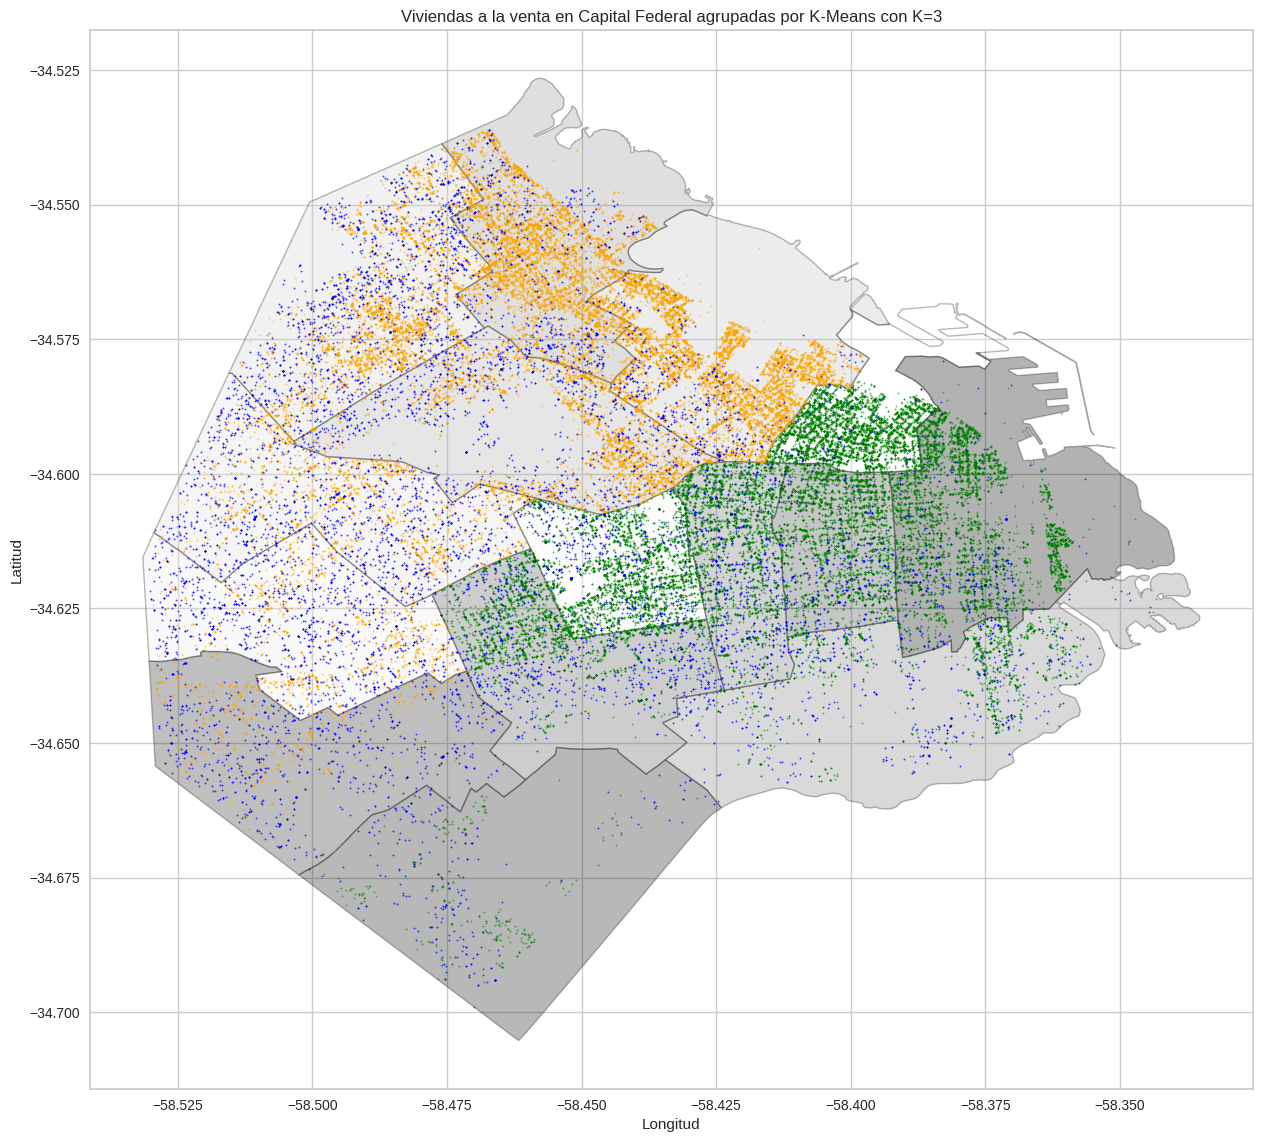

In [80]:
# Graficamos las viviendas en un mapa para visualizar su distribucion espacial
fig, ax = plt.subplots(figsize=(15, 15))
_ = df_comunas.plot(
    ax=ax, alpha=0.3, facecolor="Grey", edgecolor="k", linewidth=1, cmap="Greys"
).set(title="Viviendas a la venta en Capital Federal agrupadas por K-Means con K=3")
_ = gdf.loc[gdf.cluster_2 == 0, "geometry"].plot(
    color="green", ax=ax, alpha=0.5, markersize=1
)
_ = gdf.loc[gdf.cluster_2 == 1, "geometry"].plot(
    color="orange", ax=ax, alpha=0.5, markersize=1
)
_ = (
    gdf.loc[gdf.cluster_2 == 2, "geometry"]
    .plot(color="blue", ax=ax, alpha=0.65, markersize=1)
    .set(xlabel="Longitud", ylabel="Latitud")
)

A nivel visual podemos hacer algunas primeras observaciones:
* Nuevamente vemos dos clusters (amarillo y verde) marcados Norte-Sur, presumiblemente segun comunas.
* El cluster azul esta distribuido de manera mas dispersa en las diferentes comunas de la ciudad.
* Teniendo en cuenta el analisis anterior podriamos imaginar que la division es nuevamente por las mismas caracteristicas, amarillo y verde siendo de tipo Departamento y divididas en Norte-Sur respectivamente, mientras que el cluster azul podrian ser las propiedades de tipo PH y Casa.

##### Analicemos en mas detalle los tres clusters que se formaron: 

Al igual que en el analisis anterior, vamos a intentar descubrir a partir de que caracteristicas se formaron los 3 clusters, para ello vamos a repetir el proceso para las variables relevantes:

##### 1) Naranja

Veamos a que comunas pertenecen las propiedades del primer cluster:

In [61]:
print(sorted(gdf.loc[gdf.cluster_2 == 0, "comuna"].unique()))

[1, 2, 3, 4, 5, 6, 7, 8]


* Como notamos previamente son comunas con los numeros mas altos (9 a 15), las cuales corresponden al Norte de CABA.

A continuacion veamos los valores mas frecuentes para las variables Ambientes y Dormitorios:

In [62]:
# Calculamos la moda
gdf.loc[gdf.cluster_2 == 0, ["ambientes", "dormitorios"]].mode()

,ambientes,dormitorios
0,3.0,1.0


Ademas chequeamos la mediana para ver si hay un rango muy amplio de valores:

In [63]:
# Calculamos la mediana
gdf.loc[gdf.cluster_2 == 0, ["ambientes", "dormitorios"]].median()

ambientes      3.0
dormitorios    2.0
dtype: float64

* La mayoria de las propiedades tienen 2 ambientes y 1 dormitorio.

Veamos el promedio de superficies, tanto total como cubierta:

In [64]:
gdf.loc[gdf.cluster_2 == 0, ["superficie_total", "superficie_cubierta"]].mean()

superficie_total       75.960664
superficie_cubierta    68.429799
dtype: float64

* Como era de esperarse por el numero de ambientes y dormitorios observamos superficies relativimente pequenas:
    * Alrededor de 77m2 de superficie total.
    * Alrededor de 67m2 de superficie cubierta.

A continuacion veamos si encontramos algun patron en el tipo de propiedad:

In [65]:
gdf.loc[gdf.cluster_2 == 0].value_counts(subset=["Departamento", "PH"])

Departamento  PH 
1.0           0.0    28981
dtype: int64

Observamos que las propiedades del cluster son en su totalidad de tipo Departamento.

Por ultimo, analicemos el precio:

In [66]:
gdf.loc[gdf.cluster_2 == 0, "precio"].describe()

count    2.898100e+04
mean     1.858823e+05
std      2.329831e+05
min      5.000000e+03
25%      8.300000e+04
50%      1.230000e+05
75%      1.989000e+05
max      7.149999e+06
Name: precio, dtype: float64

Podemos hacer las siguientes observaciones:
* El precio minimo es $6.200,0
* El precio maximo es $5.800.000,0
* El precio promedio es $218.009,8
* La desviación estándar es $267.467,3
* El primer cuartil es $99.900,0
* El segundo cuartil es $145.000,0
* El tercer cuartil es $230.000,0

No se observan datos que puedan interesarnos mas alla de una desviacion estandar bastante alta, lo cual podria indicar que el precio no fue de mucha importancia en la agrupacion. 

* Notamos que el cluster coincide en su totalidad con el primer cluster de nuestro analisis anterior.

##### 2) Verde

Veamos a que comunas pertenecen las propiedades del segundo cluster:

In [67]:
print(sorted(gdf.loc[gdf.cluster_2 == 1, "comuna"].unique()))

[9, 10, 11, 12, 13, 14, 15]


* Siguiendo la linea de lo que venimos observando, son comunas con los numeros mas bajos (1 a 8), las cuales corresponden al Sur de CABA.

A continuacion veamos los valores mas frecuentes para las variables Ambientes y Dormitorios:

In [68]:
# Calculamos la moda
gdf.loc[gdf.cluster_2 == 1, ["ambientes", "dormitorios"]].mode()

,ambientes,dormitorios
0,2.0,1.0


Ademas chequeamos la mediana para ver si hay un rango muy amplio de valores:

In [69]:
# Calculamos la mediana
gdf.loc[gdf.cluster_2 == 1, ["ambientes", "dormitorios"]].median()

ambientes      2.0
dormitorios    1.0
dtype: float64

* La mayoria de las propiedades tienen 3 ambientes y 1 dormitorio.

Veamos el promedio de superficies, tanto total como cubierta:

In [70]:
gdf.loc[gdf.cluster_2 == 1, ["superficie_total", "superficie_cubierta"]].mean()

superficie_total       76.668581
superficie_cubierta    67.014189
dtype: float64

* Nos encontramos con valores similares al cluster anterior:
    * Alrededor de 76m2 de superficie total.
    * Alrededor de 68m2 de superficie cubierta.

A continuacion veamos si encontramos algun patron en el tipo de propiedad:

In [71]:
gdf.loc[gdf.cluster_2 == 1].value_counts(subset=["Departamento", "PH"])

Departamento  PH 
1.0           0.0    33266
dtype: int64

Observamos que las propiedades del cluster son en su totalidad de tipo Departamento.

Por ultimo, analicemos el precio:

In [72]:
gdf.loc[gdf.cluster_2 == 1, "precio"].describe()

count    3.326600e+04
mean     2.179959e+05
std      2.674480e+05
min      6.200000e+03
25%      9.990000e+04
50%      1.450000e+05
75%      2.300000e+05
max      5.800000e+06
Name: precio, dtype: float64

Podemos hacer las siguientes observaciones:
* El precio minimo es $5.000,0
* El precio maximo es $21.400.000,0
* El precio promedio es $186.937,6
* La desviación estándar es $268.213,8
* El primer cuartil es $83.000,0
* El segundo cuartil es $123.220,0
* El tercer cuartil es $199.600,0

No se observan datos notables mas alla de el rango tan amplio de precios, que podria indicarnos que el precio no fue tan determinante a la hora de agrupar.

* Nuevamente podemos ver que el cluster coincide en su totalidad con el tercer cluster de nuestro analisis anterior. Lo que sigue confirmando nuestra hipotesis inicial.

##### 3) Azul

Veamos a que comunas pertenecen las propiedades el tercer y ultimo cluster:

In [73]:
print(sorted(gdf.loc[gdf.cluster_2 == 2, "comuna"].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


* En este caso nos encontramos con todas las comunas, lo cual coincide con nuestro analisis visual del mapa.

A continuacion veamos los valores mas frecuentes para las variables Ambientes y Dormitorios:

In [74]:
# Calculamos la moda
gdf.loc[gdf.cluster_2 == 2, ["ambientes", "dormitorios"]].mode()

,ambientes,dormitorios
0,3.0,2.0


Ademas chequeamos la mediana para ver si hay un rango muy amplio de valores:

In [75]:
# Calculamos la mediana
gdf.loc[gdf.cluster_2 == 2, ["ambientes", "dormitorios"]].median()

ambientes      4.0
dormitorios    3.0
dtype: float64

* La mayoria de las propiedades tienen 3 ambientes y 2 dormitorio.

Veamos el promedio de superficies, tanto total como cubierta:

In [76]:
gdf.loc[gdf.cluster_2 == 2, ["superficie_total", "superficie_cubierta"]].mean()

superficie_total       160.196641
superficie_cubierta    120.810173
dtype: float64

* Como era de esperarse por el aumento en numero de ambientes y dormitorios, ademas de un rango mayor en valores, observamos superficies relativamente grandes:
    * Alrededor de 161m2 de superficie total.
    * Alrededor de 121m2 de superficie cubierta.

A continuacion veamos si encontramos algun patron en el tipo de propiedad:

In [77]:
gdf.loc[gdf.cluster_2 == 2].value_counts(subset=["Departamento", "PH"])

Departamento  PH 
0.0           1.0    7585
              0.0    2835
dtype: int64

Observamos que las propiedades del cluster son de tipo PH y tipo Casa. Tal como sospechabamos en un principio, por lo tanto no hace falta analizar el precio.

##### Conclusiones para 3 grupos:
Con lo que pudimos ver en este analisis, sumado a lo que aprendimos en el analisis previo, podemos intentar explicar en funcion a que caracteristicas se formaron.

* Como preveiamos un gran determinante fue el tipo de propiedad. El cluster azul se compuso exclusivamente de propiedades de tipo PH y Casa, es decir se combinaron en un solo cluster los dos que observamos en el analisis de 4 grupos. Ademas el tipo mas numeroso de propiedad, Departamentos, nuevamente nos dio dos clusters muy similares: el naranja y el verde.
* Como tambien sospechabamos el otro factor determinante fue el numero de comuna, que fue lo que nuevamente dividio a los Departamentos en los clusters naranja y verde, zona Norte y zona Sur respectivamente, al igual que en el analisis de 4 grupos.

Continuaremos con el analisis de los datos en la siguiente notebook.